# Découverte de PVDAQ - Farm Solar Array - 2024

In [53]:
import pandas as pd
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
# On a récupéré le dataset PVDAQ pour le système Farm Solar Array pour l'année 2024
# https://openei.org/wiki/PVDAQ/Sites/Farm_Solar_Array

df_elec = pd.read_csv("pvdaq_data_2024/2107_electrical_data_2024.csv", parse_dates=['measured_on'])
df_env  = pd.read_csv("pvdaq_data_2024/2107_environment_data_2024.csv", parse_dates=['measured_on'])
df_irr  = pd.read_csv("pvdaq_data_2024/2107_irradiance_data_2024.csv", parse_dates=['measured_on'])
df_meter = pd.read_csv("pvdaq_data_2024/2107_meter_15m_data_2024.csv", parse_dates=['measured_on'])

In [55]:
df_elec.head()

,measured_on,inv_01_dc_current_inv_149579,inv_01_dc_voltage_inv_149580,inv_01_ac_current_inv_149581,inv_01_ac_voltage_inv_149582,inv_01_ac_power_inv_149583,inv_02_dc_current_inv_149584,inv_02_dc_voltage_inv_149585,inv_02_ac_current_inv_149586,inv_02_ac_voltage_inv_149587,...,inv_23_dc_current_inv_149689,inv_23_dc_voltage_inv_149690,inv_23_ac_current_inv_149691,inv_23_ac_voltage_inv_149692,inv_23_ac_power_inv_149693,inv_24_dc_current_inv_149694,inv_24_dc_voltage_inv_149695,inv_24_ac_current_inv_149696,inv_24_ac_voltage_inv_149697,inv_24_ac_power_inv_149698
0,2024-01-01 00:05:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2024-01-01 00:10:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2024-01-01 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2024-01-01 00:20:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2024-01-01 00:25:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
df_env.head()

,measured_on,ambient_temperature_o_149575,wind_speed_o_149576,wind_direction_o_149577
0,2024-01-01 00:15:00,44.2,3.3,187.0
1,2024-01-01 00:30:00,44.2,3.3,187.0
2,2024-01-01 00:45:00,44.2,3.3,187.0
3,2024-01-01 01:00:00,43.9,2.3,183.0
4,2024-01-01 01:15:00,43.9,2.3,183.0


In [57]:
df_irr.head()

,measured_on,poa_irradiance_o_149574
0,2024-01-01 00:10:00,0.0
1,2024-01-01 00:15:00,0.0
2,2024-01-01 00:25:00,0.0
3,2024-01-01 00:40:00,0.0
4,2024-01-01 00:45:00,0.0


In [58]:
df_meter.head()

,measured_on,meter_revenue_grade_ac_output_meter_149578
0,2024-01-01 00:15:00,0.0
1,2024-01-01 00:30:00,0.0
2,2024-01-01 00:45:00,0.0
3,2024-01-01 01:00:00,0.0
4,2024-01-01 01:15:00,0.0


#### Nettoyage des identifiants des capteurs à la fin des noms des colonnes pour plus de clarté.

In [59]:
def clean_column_name(col):
    # supprime _inv_XXXXX ou _o_XXXXX
    return re.sub(r"_(inv|o|meter)_[0-9]+$", "", col)

df_elec.columns = [clean_column_name(c) for c in df_elec.columns]
df_env.columns = [clean_column_name(c) for c in df_env.columns]
df_irr.columns = [clean_column_name(c) for c in df_irr.columns]
df_meter.columns = [clean_column_name(c) for c in df_meter.columns]

print(df_elec.columns)
print(df_env.columns)
print(df_irr.columns)
print(df_meter.columns)


Index(['measured_on', 'inv_01_dc_current', 'inv_01_dc_voltage',
       'inv_01_ac_current', 'inv_01_ac_voltage', 'inv_01_ac_power',
       'inv_02_dc_current', 'inv_02_dc_voltage', 'inv_02_ac_current',
       'inv_02_ac_voltage',
       ...
       'inv_23_dc_current', 'inv_23_dc_voltage', 'inv_23_ac_current',
       'inv_23_ac_voltage', 'inv_23_ac_power', 'inv_24_dc_current',
       'inv_24_dc_voltage', 'inv_24_ac_current', 'inv_24_ac_voltage',
       'inv_24_ac_power'],
      dtype='object', length=121)
Index(['measured_on', 'ambient_temperature', 'wind_speed', 'wind_direction'], dtype='object')
Index(['measured_on', 'poa_irradiance'], dtype='object')
Index(['measured_on', 'meter_revenue_grade_ac_output'], dtype='object')


#### On merge les 4 dataset ensemble

On convertit les colonnes "measured_on" en datetime ce qui permet un merge exact et on garde seulement les timestamps communs à tous les datasets.

In [60]:
for df in [df_elec, df_env, df_irr, df_meter]:
    df['measured_on'] = pd.to_datetime(df['measured_on'])

In [61]:
merged = df_elec.merge(df_env, on='measured_on', how='inner') \
            .merge(df_irr, on='measured_on', how='inner') \
            .merge(df_meter, on='measured_on', how='inner')

## **Exploration du dataset mergé**

In [62]:
merged.head()

,measured_on,inv_01_dc_current,inv_01_dc_voltage,inv_01_ac_current,inv_01_ac_voltage,inv_01_ac_power,inv_02_dc_current,inv_02_dc_voltage,inv_02_ac_current,inv_02_ac_voltage,...,inv_24_dc_current,inv_24_dc_voltage,inv_24_ac_current,inv_24_ac_voltage,inv_24_ac_power,ambient_temperature,wind_speed,wind_direction,poa_irradiance,meter_revenue_grade_ac_output
0,2024-01-01 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,44.2,3.3,187.0,0.0,0.0
1,2024-01-01 00:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,44.2,3.3,187.0,0.0,0.0
2,2024-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,43.9,2.3,183.0,0.0,0.0
3,2024-01-01 01:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,43.9,2.3,183.0,0.0,0.0
4,2024-01-01 01:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,43.9,2.3,183.0,0.0,0.0


In [63]:
print(merged.dtypes)

measured_on                      datetime64[ns]
inv_01_dc_current                       float64
inv_01_dc_voltage                       float64
inv_01_ac_current                       float64
inv_01_ac_voltage                       float64
                                      ...      
ambient_temperature                     float64
wind_speed                              float64
wind_direction                          float64
poa_irradiance                          float64
meter_revenue_grade_ac_output           float64
Length: 126, dtype: object


In [64]:
print(merged.shape)

(24391, 126)


In [65]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24391 entries, 0 to 24390
Columns: 126 entries, measured_on to meter_revenue_grade_ac_output
dtypes: datetime64[ns](1), float64(125)
memory usage: 23.4 MB


In [66]:
merged.describe()

,measured_on,inv_01_dc_current,inv_01_dc_voltage,inv_01_ac_current,inv_01_ac_voltage,inv_01_ac_power,inv_02_dc_current,inv_02_dc_voltage,inv_02_ac_current,inv_02_ac_voltage,...,inv_24_dc_current,inv_24_dc_voltage,inv_24_ac_current,inv_24_ac_voltage,inv_24_ac_power,ambient_temperature,wind_speed,wind_direction,poa_irradiance,meter_revenue_grade_ac_output
count,24391,24391.000000,24391.000000,24391.000000,24391.000000,24391.000000,24391.000000,24391.000000,24391.000000,24391.000000,...,24391.000000,24391.000000,24391.000000,24391.000000,24391.000000,24379.00000,24391.000000,24391.000000,24391.000000,24391.000000
mean,2024-06-02 07:19:18.993071104,13.749566,433.397825,10.144358,188.241754,8.633473,13.355710,433.677479,9.986416,188.224815,...,11.830698,437.335224,9.051332,187.313630,7.637700,66.56013,5.480948,168.650486,293.579948,201.856311
min,2024-01-01 00:15:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,32.00000,1.000000,0.000000,0.000000,0.000000
25%,2024-03-19 23:37:30,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,54.30000,2.900000,113.000000,0.000000,0.000000
50%,2024-06-03 04:45:00,4.213000,626.846000,3.141000,281.024000,2.440000,3.115000,624.708000,2.880000,281.705000,...,1.232000,628.933000,2.550000,281.571000,0.641000,64.90000,4.300000,140.000000,75.300000,58.240000
75%,2024-08-15 14:07:30,28.189500,678.292500,20.938000,286.829000,18.002000,27.608000,682.693000,20.755000,287.208000,...,23.815500,690.476000,18.344000,287.051000,15.815000,78.20000,6.900000,230.000000,607.250000,428.160000
max,2024-11-01 23:15:00,51.694000,835.672000,35.328000,297.947000,30.082000,51.664000,848.281000,35.309000,298.425000,...,51.923000,892.571000,35.060000,298.085000,30.088000,105.60000,24.000000,360.000000,1358.600000,705.920000
std,NaN,16.431433,315.201233,11.886188,134.976115,10.390068,16.580086,316.624277,12.021997,135.303868,...,15.818496,324.483867,11.425284,135.521141,10.114826,15.24417,3.650220,90.938512,360.249541,239.790896


Valeurs manquantes

In [67]:
missing = merged.isna().sum()
missing = missing[missing > 0]

print(missing)


ambient_temperature    12
dtype: int64


In [68]:
print("Plage des dates où les mesures ont été réalisées")
print(merged['measured_on'].min())
print(merged['measured_on'].max())


print("\nNombre de points par jours en moyenne")
daily_counts = merged['measured_on'].dt.date.value_counts().sort_index()
print(np.average(daily_counts))

Plage des dates où les mesures ont été réalisées
2024-01-01 00:15:00
2024-11-01 23:15:00

Nombre de points par jours en moyenne
79.97049180327869


Total DC I, V and power

In [69]:
merged["I_dc_total"] = merged.filter(like="_dc_current").sum(axis=1)
merged["V_dc_avg"]   = merged.filter(like="_dc_voltage").mean(axis=1)


V = merged.filter(like="_dc_voltage")
I = merged.filter(like="_dc_current")

merged["P_dc_total"] = (V.values * I.values).sum(axis=1)


Total AC I, V and power

In [70]:
merged["I_ac_total"] = merged.filter(like="_ac_current").sum(axis=1)
merged["V_ac_total"] = merged.filter(like="_ac_voltage").mean(axis=1)

ac_cols = [col for col in merged.columns if 'ac_power' in col]
merged['P_ac_total'] = merged[ac_cols].sum(axis=1)
merged.head()

,measured_on,inv_01_dc_current,inv_01_dc_voltage,inv_01_ac_current,inv_01_ac_voltage,inv_01_ac_power,inv_02_dc_current,inv_02_dc_voltage,inv_02_ac_current,inv_02_ac_voltage,...,wind_speed,wind_direction,poa_irradiance,meter_revenue_grade_ac_output,I_dc_total,V_dc_avg,P_dc_total,I_ac_total,V_ac_total,P_ac_total
0,2024-01-01 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.3,187.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2024-01-01 00:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.3,187.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2024-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.3,183.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2024-01-01 01:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.3,183.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2024-01-01 01:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.3,183.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
cols_of_interest = [
    "measured_on",
    "poa_irradiance",
    "wind_speed",
    "wind_direction",
    "ambient_temperature",
    "meter_revenue_grade_ac_output",
    "P_dc_total",
    "I_dc_total",
    "V_dc_avg",
    "P_ac_total",
    "I_ac_total",
    "V_ac_total",
]

df = merged[cols_of_interest].copy()

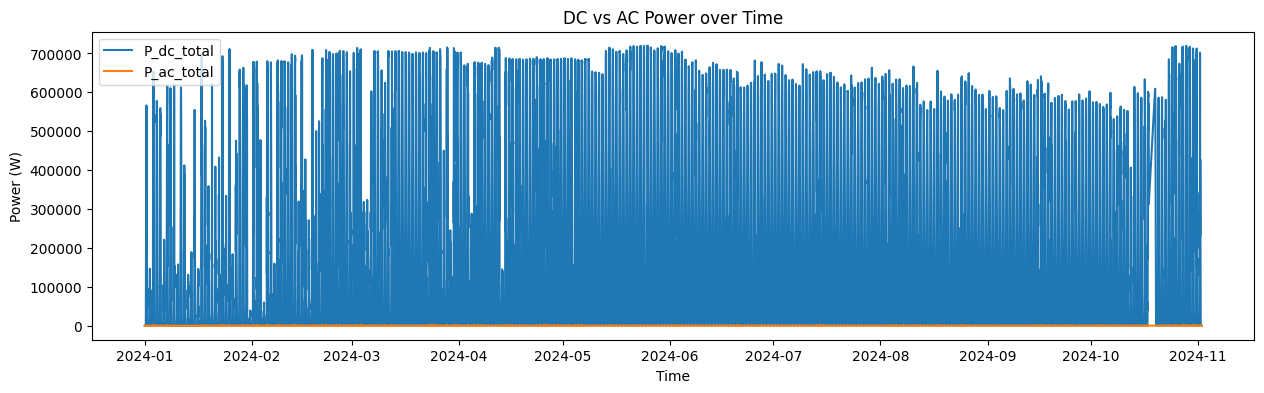

In [72]:
plt.figure(figsize=(15,4))
plt.plot(df["measured_on"], df["P_dc_total"], label="P_dc_total")
plt.plot(df["measured_on"], df["P_ac_total"], label="P_ac_total")
plt.legend()
plt.title("DC vs AC Power over Time")
plt.xlabel("Time")
plt.ylabel("Power (W)")
plt.show()


<Axes: >

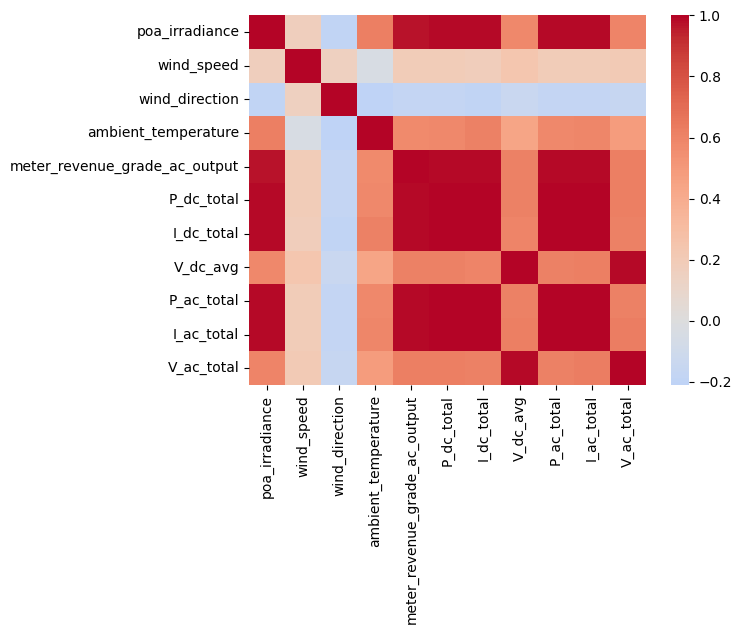

In [73]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, cmap="coolwarm", center=0)

<Axes: xlabel='hour'>

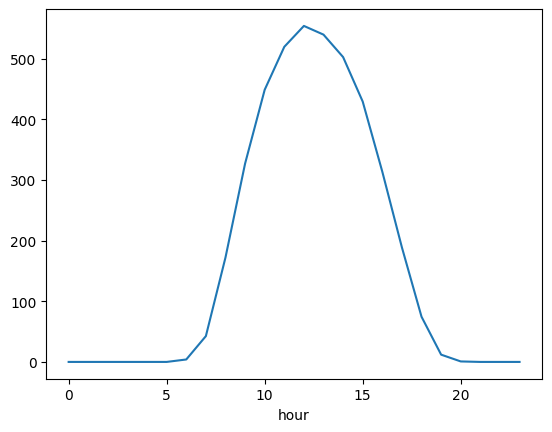

In [74]:
df["hour"] = df["measured_on"].dt.hour
df.groupby("hour")["P_ac_total"].mean().plot()

<Axes: xlabel='poa_irradiance', ylabel='P_ac_total'>

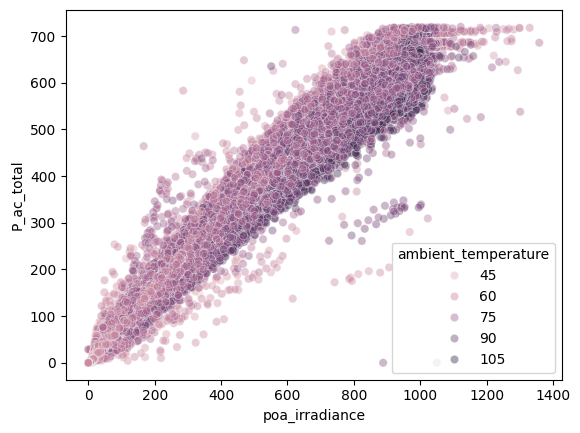

In [75]:
sns.scatterplot(
    data=df,
    x="poa_irradiance",
    y="P_ac_total",
    hue="ambient_temperature",
    alpha=0.4
)


<Axes: xlabel='hour', ylabel='date'>

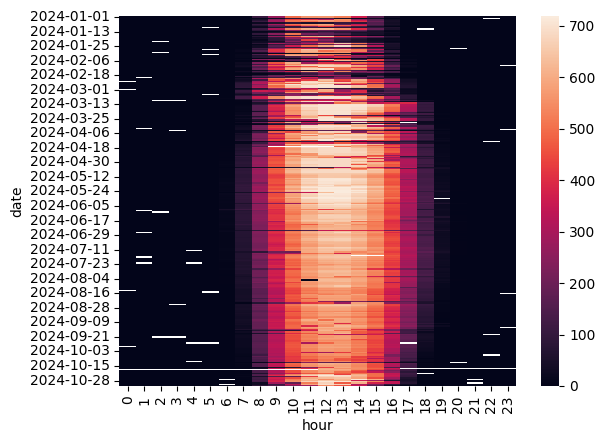

In [76]:
df["date"] = df["measured_on"].dt.date
df["hour"] = df["measured_on"].dt.hour
pivot = df.pivot_table(values="P_ac_total", index="date", columns="hour")
sns.heatmap(pivot)

## Test de Solar Data Tools sur le dataset

In [37]:
#! pip install solar-data-tools

In [77]:
df.dtypes

measured_on                      datetime64[ns]
poa_irradiance                          float64
wind_speed                              float64
wind_direction                          float64
ambient_temperature                     float64
meter_revenue_grade_ac_output           float64
P_dc_total                              float64
I_dc_total                              float64
V_dc_avg                                float64
P_ac_total                              float64
I_ac_total                              float64
V_ac_total                              float64
hour                                      int32
date                                     object
dtype: object

In [78]:
from solardatatools import DataHandler

df = df.set_index('measured_on')

dh=DataHandler(df)

dh.run_pipeline(power_col='P_ac_total')


            *********************************************
            * Solar Data Tools Data Onboarding Pipeline *
            *********************************************

            This pipeline runs a series of preprocessing, cleaning, and quality
            control tasks on stand-alone PV power or irradiance time series data.
            After the pipeline is run, the data may be plotted, filtered, or
            further analyzed.

            Authors: Bennet Meyers and Sara Miskovich, SLAC

            (Tip: if you have a mosek [https://www.mosek.com/] license and have it
            installed on your system, try setting solver='MOSEK' for a speedup)

            This material is based upon work supported by the U.S. Department
            of Energy's Office of Energy Efficiency and Renewable Energy (EERE)
            under the Solar Energy Technologies Office Award Number 38529.

            


task list:  14%|████▊                             | 1/7 [00:00<00:00,  7.25it/s]

CAUTION: Multiple scan rates detected!
Scan rates (in seconds): [900, 1800]
0 transitions detected.
Suggest splitting data set between:




task list: 100%|██████████████████████████████████| 7/7 [01:34<00:00, 13.53s/it]



total time: 94.71 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              2.12s
Cleaning                   0.17s
Filtering/Summarizing      92.42s
    Data quality           0.20s
    Clear day detect       0.18s
    Clipping detect        89.83s
    Capacity change detect 2.20s



In [79]:
print(dh.report())


-----------------
DATA SET REPORT
-----------------
length               0.84 years
capacity estimate    0.65 kW
data sampling        15 minutes
quality score        0.97
clearness score      0.53
inverter clipping    True
clipped fraction     0.13
capacity changes     True
data quality warning True
time shift errors    False
time zone errors     False
            
None


In [ ]:
#dh.plot_daily_energy
#dh.plot_heatmap

<bound method DataHandler.plot_daily_energy of <solardatatools.data_handler.DataHandler object at 0x000002DFB6AC5490>>

In [ ]:
#dh.run_loss_factor_analysis()


            ************************************************
            * Solar Data Tools Degradation Estimation Tool *
            ************************************************

            Monte Carlo sampling to generate a distributional estimate
            of the degradation rate [%/yr]

            The distribution typically stabilizes in 50-100 samples.

            Author: Bennet Meyers, SLAC

            This material is based upon work supported by the U.S. Department
            of Energy's Office of Energy Efficiency and Renewable Energy (EERE)
            under the Solar Energy Technologies Office Award Number 38529.

            


0it [00:00, ?it/s]c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
2it [00:00,  2.77it/s]c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
3it [00:01,  1.69it/s]c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._me

P50, P02.5, P97.5: nan, nan, nan
changes: nan, nan, nan


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
11it [00:07,  1.52it/s]c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
12it [00:07,  1.59it/s]c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis,

P50, P02.5, P97.5: nan, nan, nan
changes: nan, nan, nan


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
21it [00:13,  1.70it/s]c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
22it [00:13,  1.71it/s]c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis,

P50, P02.5, P97.5: nan, nan, nan
changes: nan, nan, nan


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
31it [00:18,  1.82it/s]c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
32it [00:19,  1.85it/s]c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis,

P50, P02.5, P97.5: nan, nan, nan
changes: nan, nan, nan


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
41it [00:24,  1.88it/s]c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
42it [00:24,  1.86it/s]c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis,

P50, P02.5, P97.5: nan, nan, nan
changes: nan, nan, nan


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
51it [00:29,  1.72it/s]c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
52it [00:30,  1.76it/s]c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis,

P50, P02.5, P97.5: nan, nan, nan
changes: nan, nan, nan


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
61it [00:34,  1.89it/s]c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
62it [00:35,  1.86it/s]c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis,

P50, P02.5, P97.5: nan, nan, nan
changes: nan, nan, nan


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
71it [00:40,  1.78it/s]c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
72it [00:40,  1.86it/s]c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis,

P50, P02.5, P97.5: nan, nan, nan
changes: nan, nan, nan


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
81it [00:47,  1.64it/s]c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
82it [00:48,  1.70it/s]c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis,

P50, P02.5, P97.5: nan, nan, nan
changes: nan, nan, nan


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
91it [00:53,  1.69it/s]c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
92it [00:53,  1.67it/s]c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis,

P50, P02.5, P97.5: nan, nan, nan
changes: nan, nan, nan


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
101it [00:58,  1.70it/s]c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
102it [00:59,  1.70it/s]c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axi

P50, P02.5, P97.5: nan, nan, nan
changes: nan, nan, nan


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
111it [01:04,  1.80it/s]c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
112it [01:05,  1.82it/s]c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axi

P50, P02.5, P97.5: nan, nan, nan
changes: nan, nan, nan


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
121it [01:10,  1.81it/s]c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
122it [01:10,  1.72it/s]c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axi

P50, P02.5, P97.5: nan, nan, nan
changes: nan, nan, nan


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
131it [01:15,  1.80it/s]c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
132it [01:16,  1.84it/s]c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axi

P50, P02.5, P97.5: nan, nan, nan
changes: nan, nan, nan


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
141it [01:21,  1.67it/s]c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
142it [01:22,  1.63it/s]c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axi

P50, P02.5, P97.5: nan, nan, nan
changes: nan, nan, nan


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
151it [01:29,  1.38it/s]c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
152it [01:30,  1.37it/s]c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axi

P50, P02.5, P97.5: nan, nan, nan
changes: nan, nan, nan


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
161it [01:36,  1.56it/s]c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
162it [01:36,  1.60it/s]c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axi

P50, P02.5, P97.5: nan, nan, nan
changes: nan, nan, nan


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
171it [01:42,  1.64it/s]c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
172it [01:42,  1.60it/s]c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axi

P50, P02.5, P97.5: nan, nan, nan
changes: nan, nan, nan


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
181it [01:47,  1.80it/s]c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
182it [01:48,  1.76it/s]c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axi

P50, P02.5, P97.5: nan, nan, nan
changes: nan, nan, nan


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
191it [01:53,  1.81it/s]c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
192it [01:54,  1.84it/s]c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axi

P50, P02.5, P97.5: nan, nan, nan
changes: nan, nan, nan


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
201it [01:59,  1.72it/s]c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
202it [01:59,  1.77it/s]c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axi

P50, P02.5, P97.5: nan, nan, nan
changes: nan, nan, nan


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
211it [02:04,  1.77it/s]c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
212it [02:05,  1.80it/s]c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axi

P50, P02.5, P97.5: nan, nan, nan
changes: nan, nan, nan


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
221it [02:10,  1.85it/s]c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
222it [02:10,  1.86it/s]c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axi

P50, P02.5, P97.5: nan, nan, nan
changes: nan, nan, nan


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
231it [02:16,  1.56it/s]c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
232it [02:16,  1.60it/s]c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axi

P50, P02.5, P97.5: nan, nan, nan
changes: nan, nan, nan


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
241it [02:21,  1.81it/s]c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
242it [02:22,  1.81it/s]c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axi

P50, P02.5, P97.5: nan, nan, nan
changes: nan, nan, nan


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
251it [02:27,  1.90it/s]c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
252it [02:27,  1.89it/s]c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axi

P50, P02.5, P97.5: nan, nan, nan
changes: nan, nan, nan


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
261it [02:32,  1.83it/s]c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
262it [02:33,  1.81it/s]c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axi

P50, P02.5, P97.5: nan, nan, nan
changes: nan, nan, nan


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
271it [02:38,  1.85it/s]c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
272it [02:38,  1.82it/s]c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axi

P50, P02.5, P97.5: nan, nan, nan
changes: nan, nan, nan


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
281it [02:43,  1.77it/s]c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
282it [02:44,  1.79it/s]c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axi

P50, P02.5, P97.5: nan, nan, nan
changes: nan, nan, nan


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
291it [02:49,  1.84it/s]c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
292it [02:49,  1.84it/s]c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axi

P50, P02.5, P97.5: nan, nan, nan
changes: nan, nan, nan


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
301it [02:54,  1.82it/s]c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
302it [02:55,  1.82it/s]c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axi

P50, P02.5, P97.5: nan, nan, nan
changes: nan, nan, nan


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
311it [03:00,  1.83it/s]c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
312it [03:01,  1.65it/s]c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axi

P50, P02.5, P97.5: nan, nan, nan
changes: nan, nan, nan


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
321it [03:06,  1.78it/s]c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
322it [03:06,  1.73it/s]c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axi

P50, P02.5, P97.5: nan, nan, nan
changes: nan, nan, nan


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
331it [03:11,  1.93it/s]c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
332it [03:11,  1.95it/s]c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axi

P50, P02.5, P97.5: nan, nan, nan
changes: nan, nan, nan


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
341it [03:17,  1.79it/s]c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
342it [03:17,  1.74it/s]c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axi

P50, P02.5, P97.5: nan, nan, nan
changes: nan, nan, nan


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
351it [03:22,  1.79it/s]c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
352it [03:23,  1.76it/s]c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axi

P50, P02.5, P97.5: nan, nan, nan
changes: nan, nan, nan


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
361it [03:28,  1.85it/s]c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
362it [03:28,  1.80it/s]c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axi

P50, P02.5, P97.5: nan, nan, nan
changes: nan, nan, nan


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
371it [03:33,  1.69it/s]c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
372it [03:34,  1.74it/s]c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axi

P50, P02.5, P97.5: nan, nan, nan
changes: nan, nan, nan


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
381it [03:39,  1.76it/s]c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
382it [03:40,  1.78it/s]c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axi

P50, P02.5, P97.5: nan, nan, nan
changes: nan, nan, nan


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
391it [03:45,  1.54it/s]c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
392it [03:46,  1.54it/s]c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axi

P50, P02.5, P97.5: nan, nan, nan
changes: nan, nan, nan


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
401it [03:51,  1.55it/s]c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
402it [03:52,  1.54it/s]c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axi

P50, P02.5, P97.5: nan, nan, nan
changes: nan, nan, nan


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
411it [03:58,  1.63it/s]c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
412it [03:58,  1.63it/s]c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axi

P50, P02.5, P97.5: nan, nan, nan
changes: nan, nan, nan


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
421it [04:03,  1.79it/s]c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
422it [04:04,  1.79it/s]c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axi

P50, P02.5, P97.5: nan, nan, nan
changes: nan, nan, nan


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
431it [04:09,  1.78it/s]c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
432it [04:09,  1.83it/s]c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axi

P50, P02.5, P97.5: nan, nan, nan
changes: nan, nan, nan


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
441it [04:14,  1.76it/s]c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
442it [04:15,  1.76it/s]c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axi

P50, P02.5, P97.5: nan, nan, nan
changes: nan, nan, nan


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
451it [04:20,  1.51it/s]c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
452it [04:21,  1.51it/s]c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axi

P50, P02.5, P97.5: nan, nan, nan
changes: nan, nan, nan


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
461it [04:26,  1.70it/s]c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
462it [04:27,  1.68it/s]c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axi

P50, P02.5, P97.5: nan, nan, nan
changes: nan, nan, nan


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
471it [04:32,  1.72it/s]c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
472it [04:33,  1.73it/s]c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axi

P50, P02.5, P97.5: nan, nan, nan
changes: nan, nan, nan


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
481it [04:38,  1.81it/s]c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
482it [04:39,  1.76it/s]c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axi

P50, P02.5, P97.5: nan, nan, nan
changes: nan, nan, nan


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
491it [04:43,  1.83it/s]c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
492it [04:44,  1.63it/s]c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axi

P50, P02.5, P97.5: nan, nan, nan
changes: nan, nan, nan


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
501it [04:49,  1.83it/s]c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
501it [04:50,  1.73it/s]


Performing loss factor analysis...


TypeError: 'NoneType' object is not subscriptable

In [ ]:
#dh.loss_analysis.plot_pie

In [ ]:
#dh.loss_analysis.plot_decomposition

In [ ]:
# samples_per_day = 96  # 15-min intervals

# # Group by day
# daily_groups = df['total_ac_power'].resample('D')

# # Create matrix
# matrix = np.array([day.values for day in daily_groups if len(day) == samples_per_day])
# print(matrix.shape)

(0,)


(CVXPY) Nov 17 02:57:15 PM: Your problem has 36378 variables, 57694 constraints, and 1536 parameters.
(CVXPY) Nov 17 02:57:15 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Nov 17 02:57:15 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Nov 17 02:57:15 PM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Nov 17 02:57:15 PM: Compiling problem (target solver=CLARABEL).
(CVXPY) Nov 17 02:57:15 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> CLARABEL
(CVXPY) Nov 17 02:57:15 PM: Applying reduction Dcp2Cone
(CVXPY) Nov 17 02:57:15 PM: Applying reduction CvxAttr2Constr
(CVXPY) Nov 17 02:57:15 PM: Applying reduction ConeMatrixStuffing


                                     CVXPY                                     
                                     v1.7.3                                    
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------


(CVXPY) Nov 17 02:57:15 PM: Applying reduction CLARABEL
(CVXPY) Nov 17 02:57:15 PM: Finished problem compilation (took 8.718e-01 seconds).
(CVXPY) Nov 17 02:57:15 PM: (Subsequent compilations of this problem, using the same arguments, should take less time.)
(CVXPY) Nov 17 02:57:15 PM: Invoking solver CLARABEL  to obtain a solution.


-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
-------------------------------------------------------------
           Clarabel.rs v0.11.1  -  Clever Acronym                

                   (c) Paul Goulart                          
                University of Oxford, 2022                   
-------------------------------------------------------------

problem:
  variables     = 95420
  constraints   = 128768
  nnz(P)        = 47010
  nnz(A)        = 445158
  cones (total) = 2
    :        Zero = 1,  numel = 69120
    : Nonnegative = 1,  numel = 59648

settings:
  linear algebra: direct / faer, precision: 64 bit (8 threads)
  max iter = 200, time limit = Inf,  max step = 0.990
  tol_feas = 1.0e-8, tol_gap_abs = 1.0e-8, tol_gap_rel = 1.0e-8,
  static reg : on, ϵ1 = 1.0e-8, ϵ2 = 4.9e-32
  d

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\cvxpy\problems\problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
(CVXPY) Nov 17 03:03:24 PM: Problem status: optimal_inaccurate
(CVXPY) Nov 17 03:03:24 PM: Optimal value: 9.909e+02
(CVXPY) Nov 17 03:03:24 PM: Compilation took 8.718e-01 seconds
(CVXPY) Nov 17 03:03:24 PM: Solver (including time spent in interface) took 3.685e+02 seconds


200  +9.9087e+02  +9.9087e+02  2.18e-08  2.86e-08  2.84e-14  5.39e-11  1.18e-11  5.12e-02  
---------------------------------------------------------------------------------------------
Terminated with status = AlmostSolved
solve time = 368.2168564s
-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
True
component arg must be one of ['clear', 'shade', 'residual']


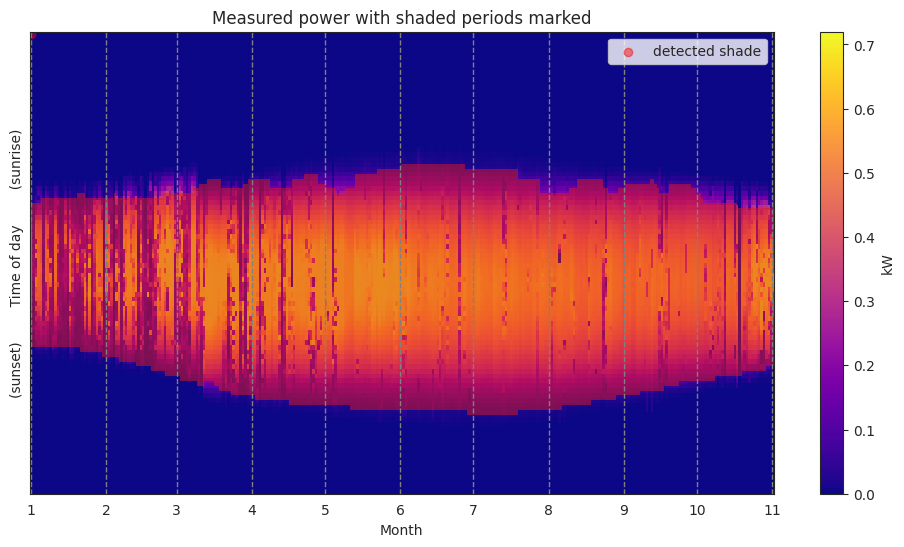

In [80]:
from solardatatools.algorithms.shade import ShadeAnalysis

shade = ShadeAnalysis(data_handler=dh, matrix=None)

# Run the shading detection
shade.run(power=8, solver='CLARABEL', verbose=True)

# Check if the analysis ran
print(shade.has_run)  # True if completed

# Plot heatmap of shading anomalies
shade.plot_annotated_heatmap(figsize=(12,6))

# component analysis
shade.plot_component('shading')